Link to paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7948653/
Link to GitHub: https://github.com/NourozR/Stock-Price-Prediction-LSTM/blob/master/StockPricePrediction.py

**LOAD IN preprocessing.py and INDEX.csv INTO RUNTIME FOR CODE TO RUN**

In [2]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 
import yahoodata as yd # File added as a function to parse our index data

In [3]:
# IMPORTING DATASET NEW
# XLV: Health Care Select Sector SPDR Fund

dataset = yd.pullStockData("XLV", 2021, 10, 1, 2021, 11, 17)

dataset


,High,Low,Open,Close
Date,,,,
2021-10-01,127.930000,125.279999,127.470001,127.330002
2021-10-04,127.459999,124.760002,126.809998,125.389999
2021-10-05,127.419998,125.730003,125.900002,126.139999
2021-10-06,126.019997,124.500000,125.440002,125.910004
2021-10-07,128.399994,126.540001,126.779999,127.580002
2021-10-08,128.000000,126.680000,127.760002,126.940002
2021-10-11,127.500000,125.910004,126.830002,125.949997
2021-10-12,126.480003,125.025002,126.349998,125.339996
2021-10-13,126.105003,124.764999,125.550003,125.540001


In [4]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

In [5]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

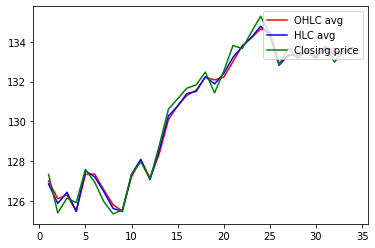

In [6]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()


In [7]:
# PREPARATION OF TIME SERIES DATASET
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [8]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.7) #Changed to a 30/70 split from original dataset
train_OHLC_placeholder = train_OHLC
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [9]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
testX, testY = preprocessing.new_dataset(test_OHLC, 1)

In [10]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [11]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

2021-12-10 17:53:55.551989: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse','mae']) # Try SGD, adam, adagrad and compare!!!
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2) #changed this line

Epoch 1/50
21/21 - 3s - loss: 0.2197 - mse: 0.2197 - mae: 0.3641 - 3s/epoch - 124ms/step
Epoch 2/50
21/21 - 0s - loss: 0.1864 - mse: 0.1864 - mae: 0.3307 - 68ms/epoch - 3ms/step
Epoch 3/50
21/21 - 0s - loss: 0.1551 - mse: 0.1551 - mae: 0.2998 - 45ms/epoch - 2ms/step
Epoch 4/50
21/21 - 0s - loss: 0.1192 - mse: 0.1192 - mae: 0.2677 - 48ms/epoch - 2ms/step
Epoch 5/50
21/21 - 0s - loss: 0.0883 - mse: 0.0883 - mae: 0.2402 - 42ms/epoch - 2ms/step
Epoch 6/50
21/21 - 0s - loss: 0.0642 - mse: 0.0642 - mae: 0.2181 - 39ms/epoch - 2ms/step
Epoch 7/50
21/21 - 0s - loss: 0.0524 - mse: 0.0524 - mae: 0.2070 - 42ms/epoch - 2ms/step
Epoch 8/50
21/21 - 0s - loss: 0.0462 - mse: 0.0462 - mae: 0.1965 - 41ms/epoch - 2ms/step
Epoch 9/50
21/21 - 0s - loss: 0.0434 - mse: 0.0434 - mae: 0.1889 - 41ms/epoch - 2ms/step
Epoch 10/50
21/21 - 0s - loss: 0.0387 - mse: 0.0387 - mae: 0.1769 - 40ms/epoch - 2ms/step
Epoch 11/50
21/21 - 0s - loss: 0.0341 - mse: 0.0341 - mae: 0.1661 - 43ms/epoch - 2ms/step
Epoch 12/50
21/21 -

In [13]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [14]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 0.84


In [16]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))


Test RMSE: 1.18


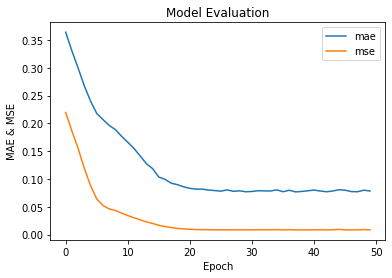

In [17]:
plt.plot(history.history['mae'], label = "mae")
plt.plot(history.history['mse'], label = "mse")

plt.title('Model Evaluation')
plt.ylabel("MAE & MSE")
plt.xlabel("Epoch")
plt.legend(loc = 'upper right')
plt.show()

In [18]:
# NEW: AUC?? Maybe not include...
results = model.evaluate(testPredict, np.concatenate(testY), batch_size = 1)
print("test loss, test mae:", results)


9/9 [==============================] - 1s 2ms/step - loss: 16772.7285 - mse: 16772.7285 - mae: 129.5089
test loss, test mae: [16772.728515625, 16772.728515625, 129.50892639160156]


In [19]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [20]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [21]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

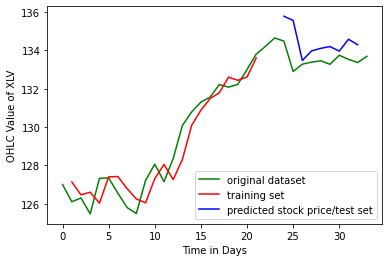

In [22]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'lower right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of XLV')
plt.savefig("images/XLV_lag.png", dpi=1000)
plt.show()


In [23]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
# print np.append(last_val, next_val)


In [24]:
"Last Day Value:", last_val.item()

('Last Day Value:', 134.30198669433594)

In [25]:
#This is our valuation set. Basically, we now know that the data isn't seeing future data that it isn't supposed to see. Rather, it's making true predictions!

"Next Day Value:", (last_val*next_val).item()

('Next Day Value:', 150.8868865966797)